In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import glob

sns.set()

import sys
sys.path.append('../')

from src import EVAL_RESULTS_PATH

### Random ranking

In [2]:
def get_random_mrr(n_pos_neg_per_sample):
    return np.array([1/i for i in range(1, n_pos_neg_per_sample+1)]).mean()

In [3]:
get_random_mrr(500)

0.01358564685998105

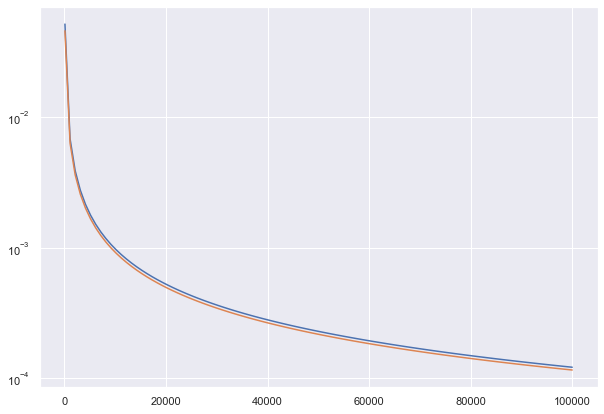

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))
x_range = np.linspace(100, 100000, 100, dtype=np.int)
rand_mrr = [get_random_mrr(x) for x in x_range]
rand_mrr_approx = [np.log(x)/x for x in x_range]
sns.lineplot(x_range, rand_mrr)
sns.lineplot(x_range, rand_mrr_approx)
plt.yscale('log')
# plt.xscale('log')
# ax.set_xticks(x_range)
# ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# plt.xscale('log')

##  Evaluation

In [16]:
# Loading mrr matrices
mrr_dict = {}
mrr_time_dict = {}
for filename in glob.glob(f'{EVAL_RESULTS_PATH}/*'):
    if len(filename.split('/')[-1].split('_', maxsplit=1)[1].split('_')) == 1:
        key = tuple(int(n) for n in filename.split('/')[-1].split('_')[-1].split('.')[0].split('*'))
        mrr_dict[key] = pd.read_csv(filename, index_col=0)        
    else:
        key = filename.split('/')[-1].split('_', maxsplit=1)[1].split('_')[-1].split('.')[0]
        mrr_time_dict[key] = pd.read_csv(filename, index_col=0)

In [26]:
n_samples_range = set()
n_pos_neg_per_sample_range = set()
time_range = set(mrr_time_dict.keys())
for k in mrr_dict:
    n_samples_range.add(k[0])
    n_pos_neg_per_sample_range.add(k[1])    

In [20]:
n_samples_df = pd.DataFrame({n_samples: mrr_dict[n_samples, 500].loc['x_citation_1_hop_sim'] for n_samples in n_samples_range})
n_samples_df = n_samples_df.stack().reset_index()
n_samples_df = n_samples_df.rename(columns={'level_0': 'similarity', 'level_1': 'n_samples', 0: 'mrr'})
n_samples_df = n_samples_df[n_samples_df.similarity != 'x_citation_1_hop_sim']

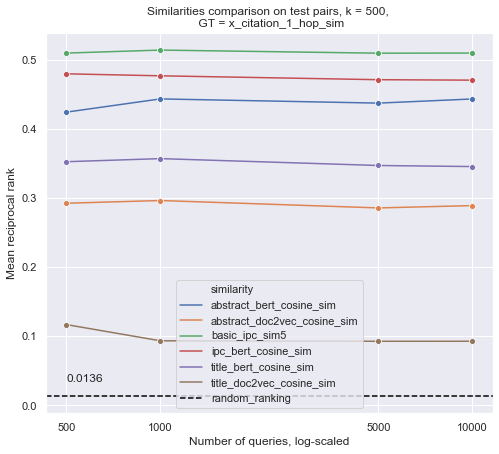

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (8, 7))
sns.lineplot(x='n_samples', y='mrr', hue='similarity', data=n_samples_df, marker='o')
ax.axhline(y=get_random_mrr(500), color='black', linestyle='--', label='random_ranking')
ax.text(500, get_random_mrr(500) + 0.02, f'{get_random_mrr(500):.3}')
plt.xscale('log')
plt.legend()
ax.set_xticks(sorted(n_samples_df.n_samples.unique()))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.set_xlabel('Number of queries, log-scaled')
ax.set_ylabel('Mean reciprocal rank')
plt.title('Similarities comparison on test pairs, k = 500, \n GT = x_citation_1_hop_sim')
plt.savefig('../reports/figures/consistency_queries.png', dpi = 300)

In [22]:
n_pos_neg_per_sample_df = pd.DataFrame({n_pos_neg_per_sample: mrr_dict[500, n_pos_neg_per_sample].loc['x_citation_1_hop_sim'] for n_pos_neg_per_sample in n_pos_neg_per_sample_range})
n_pos_neg_per_sample_df = n_pos_neg_per_sample_df.stack().reset_index()
n_pos_neg_per_sample_df = n_pos_neg_per_sample_df.rename(columns={'level_0': 'similarity', 'level_1': 'n_pos_neg_per_sample', 0: 'mrr'})
n_pos_neg_per_sample_df = n_pos_neg_per_sample_df[n_pos_neg_per_sample_df.similarity != 'x_citation_1_hop_sim']


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:834: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


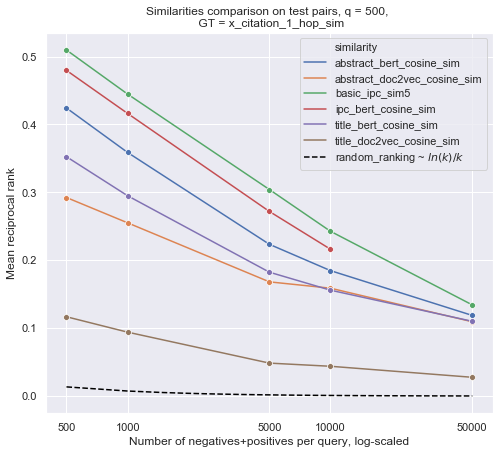

In [23]:
fig, ax = plt.subplots(1, 1, figsize = (8, 7))
sns.lineplot(x='n_pos_neg_per_sample', y='mrr', hue='similarity', data=n_pos_neg_per_sample_df, marker='o')
x_range = np.linspace(500, 50000, 100, dtype=np.int)
rand_mrr = [get_random_mrr(x) for x in x_range]
sns.lineplot(x_range, rand_mrr, label='random_ranking ~ $ln(k)/k$', c='black')
ax.lines[-1].set_linestyle("--")
plt.xscale('log')
plt.legend()
# plt.yscale('log')
ax.set_xticks(sorted(n_pos_neg_per_sample_df.n_pos_neg_per_sample.unique()))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# ax.set_yticks()
# ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.set_xlabel('Number of negatives+positives per query, log-scaled')
ax.set_ylabel('Mean reciprocal rank')
plt.title('Similarities comparison on test pairs, q = 500, \n GT = x_citation_1_hop_sim')
plt.savefig('../reports/figures/consistency_neg+pos.png', dpi = 300)
#plt.xscale('log')

In [48]:
time_df = pd.DataFrame({time: mrr_time_dict[time].loc['x_citation_1_hop_sim'] for time in time_range})
time_df = time_df.stack().reset_index()
time_df = time_df.rename(columns={'level_0': 'similarity', 'level_1': 'time_limit', 0: 'mrr'})
time_df = time_df[time_df.similarity != 'x_citation_1_hop_sim']
time_df.time_limit = time_df.time_limit.astype(int)

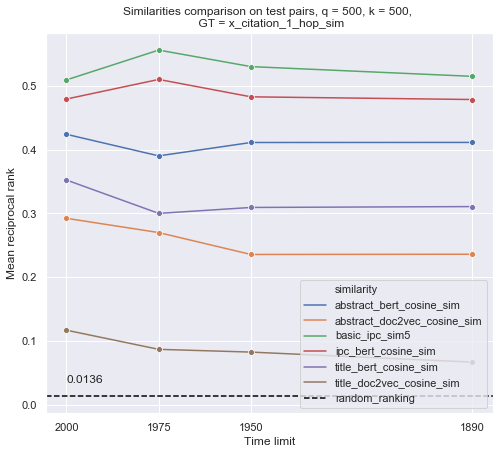

In [55]:
fig, ax = plt.subplots(1, 1, figsize = (8, 7))
sns.lineplot(x='time_limit', y='mrr', hue='similarity', data=time_df, marker='o')
ax.axhline(y=get_random_mrr(500), color='black', linestyle='--', label='random_ranking')
ax.text(2000, get_random_mrr(500) + 0.02, f'{get_random_mrr(500):.3}')
plt.legend()
plt.gca().invert_xaxis()
ax.set_xticks(sorted(time_df.time_limit.unique().astype(int)))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.set_xlabel('Time limit')
ax.set_ylabel('Mean reciprocal rank')
plt.title('Similarities comparison on test pairs, q = 500, k = 500, \n GT = x_citation_1_hop_sim')
plt.savefig('../reports/figures/consistency_time.png', dpi = 300)